In [48]:

import sys
sys.path.append('..')
import tangles
import cost_functions
import cut_finding
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import random

from collections import Counter

from sklearn.metrics import normalized_mutual_info_score as NMI
import tqdm
import importlib
import time
import cut_finding
import plotting
import dataset_generation
import utils
from numpy_kmeans import NumpyKMeans


def reload():
    importlib.reload(tangles)
    importlib.reload(cost_functions)
    importlib.reload(cut_finding)
    importlib.reload(tangles)
    importlib.reload(plotting)
    importlib.reload(dataset_generation)
    importlib.reload(utils)


In [53]:
from functools import partial

import sklearn.preprocessing

reload()

runs = 200

seed_start = random.randint(0, 1000)
seeds = range(seed_start, seed_start + runs)

results = []
k=50

def means_func(size):
    return 12 * np.random.random(size=size)

axis_parallel_cut_function = partial(cut_finding.axis_parallel_cuts, k=k)

distance_to_other_side = partial(cost_functions.OptimizedDistanceToOtherSide, k=k)

clusters_sizes = [2, 3, 5, 7]
dimensions = 2

data_sizes = [1000]
for n_clusters in clusters_sizes:
    for data_size in reversed(data_sizes):

        range_axis_parallel = partial(cut_finding.range_axis_parallel, agreement_param=data_size / 50)

        for i in tqdm.tqdm(range(runs)):
            np.random.seed(seeds[i])

            data, labels = dataset_generation.create_2d_test_data(
                # means=10*np.random.random(size=(n_clusters, dimension)),
                n_clusters=n_clusters,
                dimensions=dimensions,
                scales=np.random.choice([0.5, 2], size=(n_clusters, dimensions)),
                weights = np.ones(n_clusters),
                # weights=0.25 + 0.75*np.random.random(size=n_clusters),
                min_distance=3,
                # weights=np.array(weights[n_clusters]),
                num_samples=data_size
            )

            MinMaxScaler = sklearn.preprocessing.MinMaxScaler()
            data = MinMaxScaler.fit_transform(data)

            agreement_param = (min(Counter(labels).values()) * (0.4))
            agreement_param /= len(labels)

            models = {
                "Similarity Matrix": partial(tangles.TangleClustering,
                                            cost_class=cost_functions.SimilarityMatrix,
                                            cut_function=axis_parallel_cut_function,
                                            agreement_param=agreement_param),
                "Sum of Distances": partial(tangles.TangleClustering,
                                            cost_class=cost_functions.SumOfDistances,
                                            cut_function=axis_parallel_cut_function,
                                            agreement_param=agreement_param,
                                            ),
                "Border Distances": partial(tangles.TangleClustering,
                                            cost_class=cost_functions.BorderDistances,
                                            cut_function=axis_parallel_cut_function,
                                            agreement_param=agreement_param,
                                            ),
                "Region Agg. (Similarity Matrix)": partial(tangles.TangleClustering,
                                            cost_class=cost_functions.RegionAggregation,
                                            cut_function=axis_parallel_cut_function,
                                            agreement_param=agreement_param
                                            ),
                "Kmeans": NumpyKMeans
            }

            current_results = []

            for model_name, Model in models.items():
                starttime = time.time()
                model = Model(n_clusters=n_clusters)
                preds = model.fit_predict(data)
                time_ = time.time() - starttime
                nmi = sklearn.metrics.normalized_mutual_info_score(
                    labels, preds)

                current_results.append([ model_name,  n_clusters, data_size, nmi, seeds[i], time_, dimensions])

            results.extend(current_results)

100%|██████████| 200/200 [01:12<00:00,  2.77it/s]


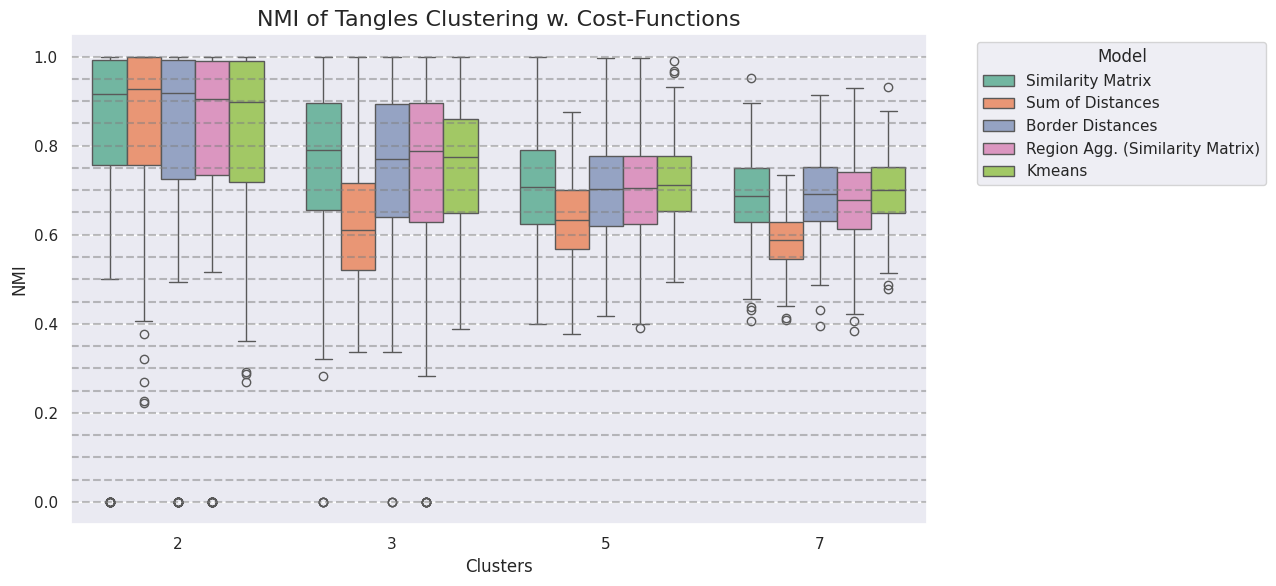

In [55]:
reload()

sns.set_theme(style="darkgrid")

df = pd.DataFrame(results, columns=["Model",
                                    "Clusters",
                                    "Data-Size",
                                    "NMI",
                                    "Seed",
                                    "Time",
                                    "Dimensions",
                                    ])

plotting.BoxPlot(df).nmi(x="Clusters")
plt.title("NMI of Tangles Clustering w. Cost-Functions", fontsize=16)

plt.savefig("plots/cost-function-performance.png")


In [36]:
from functools import partial

import sklearn.preprocessing

reload()

runs = 10

seed_start = random.randint(0, 1000)
seeds = range(seed_start, seed_start + runs)

# results = []
k = 50

def means_func(size):
    return 12 * np.random.random(size=size)

axis_parallel_cut_function = partial(cut_finding.axis_parallel_cuts, k=k)

clusters_sizes = [3]
dimensions = 2

data_sizes = range(10000, 100000, 1000)
for n_clusters in clusters_sizes:
    for data_size in data_sizes:
        range_axis_parallel = partial(cut_finding.range_axis_parallel, agreement_param=data_size / 50)

        for i in tqdm.tqdm(range(runs)):
            np.random.seed(seeds[i])

            data, labels = dataset_generation.create_2d_test_data(
                # means=10*np.random.random(size=(n_clusters, dimension)),
                n_clusters=n_clusters,
                dimensions=dimensions,
                scales=np.random.choice([0.5, 2], size=(n_clusters, dimensions)),
                weights = np.ones(n_clusters),
                # weights=0.25 + 0.75*np.random.random(size=n_clusters),
                min_distance=3,
                # weights=np.array(weights[n_clusters]),
                num_samples=data_size
            )

            MinMaxScaler = sklearn.preprocessing.MinMaxScaler()
            data = MinMaxScaler.fit_transform(data)

            agreement_param = (min(Counter(labels).values()) * (0.4))
            agreement_param /= len(labels)

            models = {
                "Similarity Matrix": partial(tangles.TangleClustering,
                                            cost_class=cost_functions.SimilarityMatrix,
                                            cut_function=axis_parallel_cut_function,
                                            agreement_param=agreement_param),
                "Sum of Distances": partial(tangles.TangleClustering,
                                            cost_class=cost_functions.SumOfDistances,
                                            cut_function=axis_parallel_cut_function,
                                            agreement_param=agreement_param,
                                            ),
                "Border Distances": partial(tangles.TangleClustering,
                                            cost_class=cost_functions.BorderDistances,
                                            cut_function=axis_parallel_cut_function,
                                            agreement_param=agreement_param,
                                            ),
                "Region Agg. (Similarity Matrix)": partial(tangles.TangleClustering,
                                            cost_class=cost_functions.RegionAggregation,
                                            cut_function=axis_parallel_cut_function,
                                            agreement_param=agreement_param
                                            ),
                "Kmeans": NumpyKMeans
            }

            current_results = []

            for model_name, Model in models.items():
                if (model_name == "Similarity Matrix" or model_name == "Sum of Distances") and data_size > 4000:
                    continue

                starttime = time.time()
                model = Model(n_clusters=n_clusters)
                preds = model.fit_predict(data)
                time_ = time.time() - starttime
                nmi = sklearn.metrics.normalized_mutual_info_score(
                    labels, preds)

                current_results.append([ model_name,  n_clusters, data_size, nmi, seeds[i], time_, dimensions])

            results.extend(current_results)

100%|██████████| 10/10 [00:13<00:00,  1.37s/it]


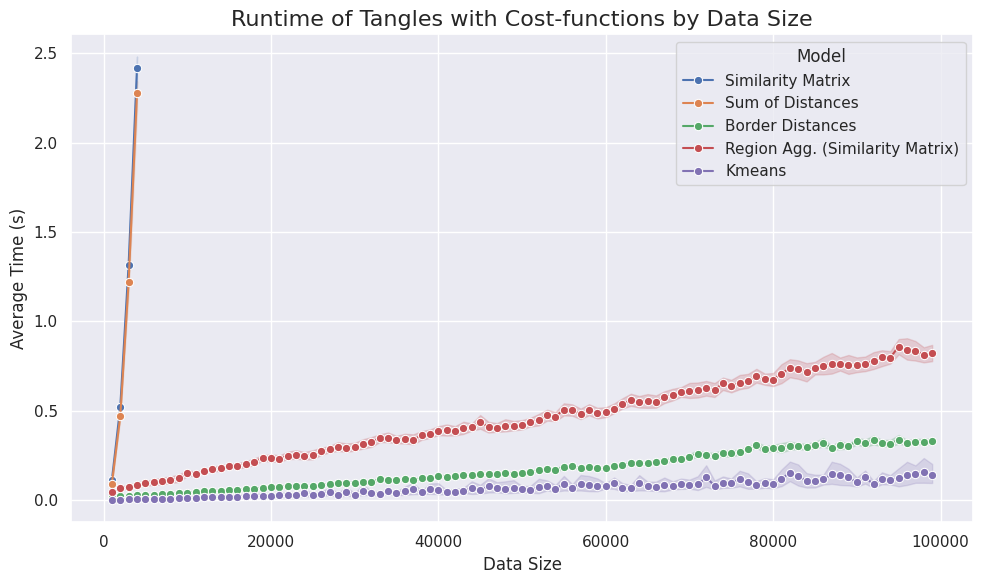

In [41]:


reload()
sns.set_theme(style="darkgrid")
df = pd.DataFrame(results, columns=["Model",
                                    "Clusters",
                                    "Data-Size",
                                    "NMI",
                                    "Seed",
                                    "Time",
                                    "Dimensions"
                                    ])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Data-Size", y="Time", hue="Model", marker="o")

plt.title("Runtime of Tangles with Cost-functions by Data Size", fontsize=16)
plt.xlabel("Data Size")
plt.ylabel("Average Time (s)")
plt.legend(title="Model")

plt.tight_layout()
plt.savefig("plots/cost-function-runtime.png", dpi=300, bbox_inches="tight")
plt.show()

100%|██████████| 10/10 [00:00<00:00, 12.63it/s]


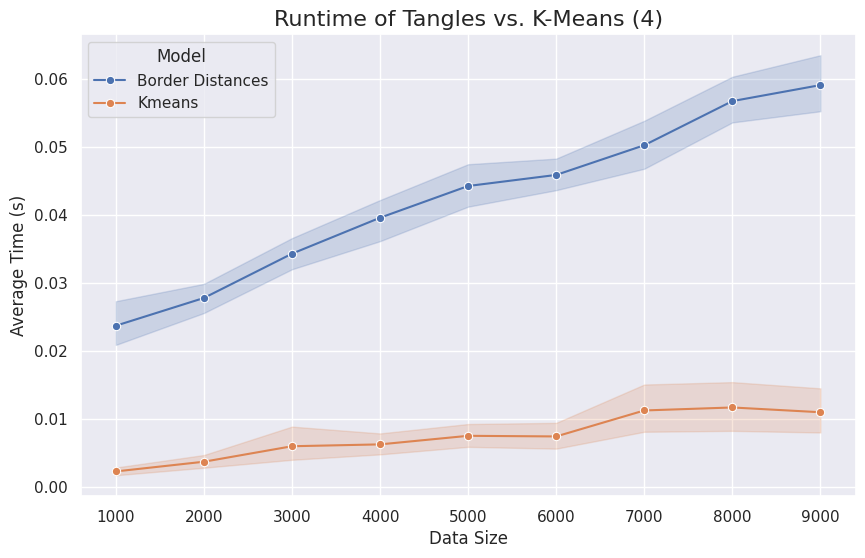

100%|██████████| 10/10 [00:01<00:00,  6.29it/s]


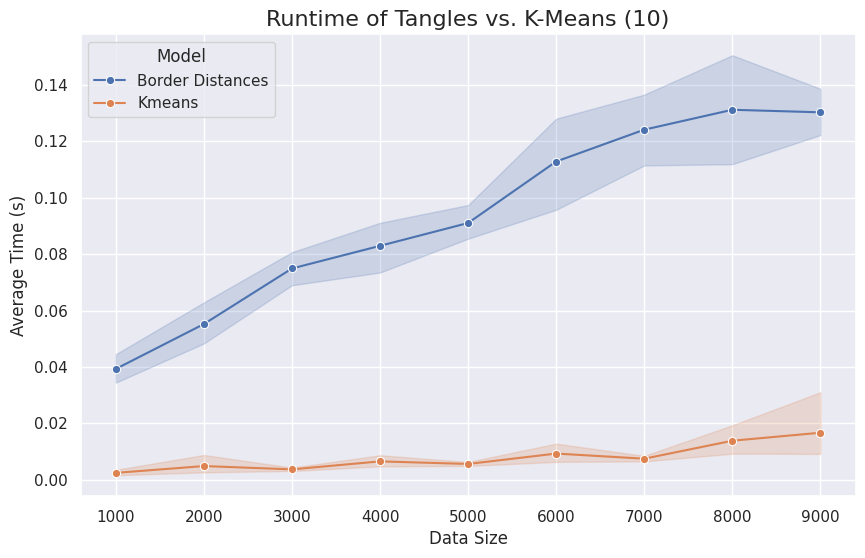

In [62]:
from functools import partial

import sklearn.preprocessing

reload()

runs = 10

seed_start = random.randint(0, 1000)
seeds = range(seed_start, seed_start + runs)

k=33

def means_func(size):
    return 12 * np.random.random(size=size)

axis_parallel_cut_function = partial(cut_finding.axis_parallel_cuts, k=k)

clusters_sizes = [3]
dimensions = 3

data_sizes = range(1000, 10000, 1000)

for dimensions in [4, 10]:
    results = []
    axis_parallel_cut_function = partial(
        cut_finding.axis_parallel_cuts, k=int(100 / dimensions))

    for n_clusters in clusters_sizes:
        for data_size in data_sizes:
            for i in tqdm.tqdm(range(runs)):
                data, labels = dataset_generation.create_2d_test_data(
                    # means=10*np.random.random(size=(n_clusters, dimension)),
                    n_clusters=n_clusters,
                    dimensions=dimensions,
                    scales=np.random.choice([0.5, 2], size=(n_clusters, dimensions)),
                    weights = np.ones(n_clusters),
                    # weights=0.25 + 0.75*np.random.random(size=n_clusters),
                    min_distance=3,
                    # weights=np.array(weights[n_clusters]),
                    num_samples=data_size
                )

                MinMaxScaler = sklearn.preprocessing.MinMaxScaler()
                data = MinMaxScaler.fit_transform(data)

                agreement_param = (min(Counter(labels).values()) * (0.4))
                agreement_param /= len(labels)

                models = {
                    "Border Distances": partial(tangles.TangleClustering,
                                                cost_class=cost_functions.BorderDistances,
                                                cut_function=axis_parallel_cut_function,
                                                agreement_param=agreement_param,
                                                ),
                    "Kmeans": NumpyKMeans
                }

                current_results = []

                for model_name, Model in models.items():

                    starttime = time.time()
                    model = Model(n_clusters=n_clusters)
                    preds = model.fit_predict(data)
                    time_ = time.time() - starttime
                    nmi = sklearn.metrics.normalized_mutual_info_score(
                        labels, preds)

                    current_results.append([ model_name,  n_clusters, data_size, nmi, seeds[i], time_, dimensions])

                results.extend(current_results)

    df = pd.DataFrame(results, columns=["Model",
                                    "Clusters",
                                    "Data-Size",
                                    "NMI",
                                    "Seed",
                                    "Time",
                                    "Dimensions"
                                    ])

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="Data-Size", y="Time", hue="Model", marker="o")

    plt.title(f"Runtime of Tangles vs. K-Means ({dimensions})", fontsize=16)
    plt.xlabel("Data Size")
    plt.ylabel("Average Time (s)")
    plt.legend(title="Model")
    plt.show()

# plt.suptitle("Runtime of Tangles vs. K-Means", fontsize=16)

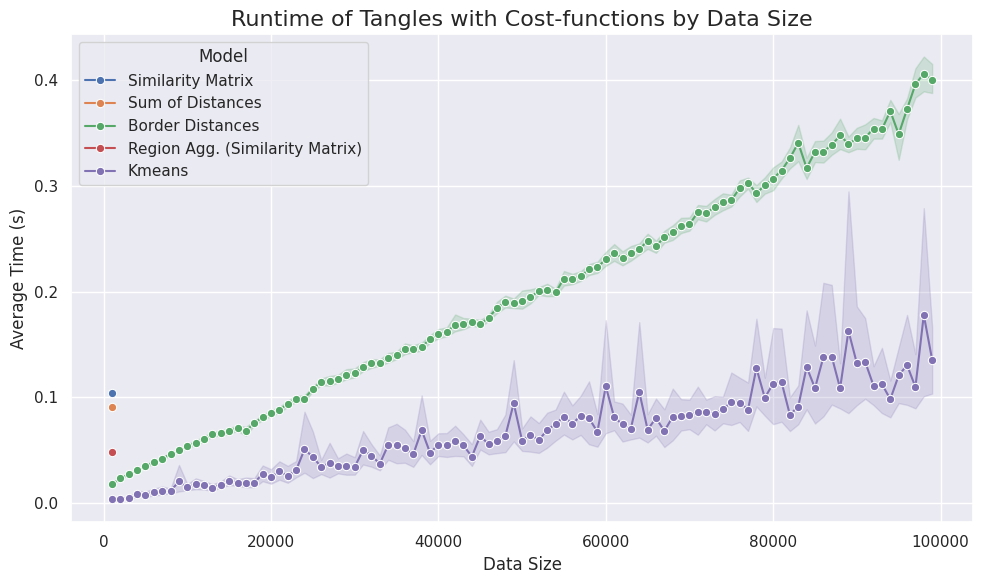

In [58]:


reload()
sns.set_theme(style="darkgrid")
df = pd.DataFrame(results, columns=["Model",
                                    "Clusters",
                                    "Data-Size",
                                    "NMI",
                                    "Seed",
                                    "Time",
                                    "Dimensions"
                                    ])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Data-Size", y="Time", hue="Model", marker="o")

plt.title("Runtime of Tangles with Cost-functions by Data Size", fontsize=16)
plt.xlabel("Data Size")
plt.ylabel("Average Time (s)")
plt.legend(title="Model")

plt.tight_layout()
# plt.savefig("plots/cost-function-runtime.png", dpi=300, bbox_inches="tight")
# plt.show()